In [ ]:
import numpy as np 
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
# loading the data
T = transforms.Compose([transforms.ToTensor()])

batch_size = 64

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=T)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=T)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(256, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# print(trains.shape)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


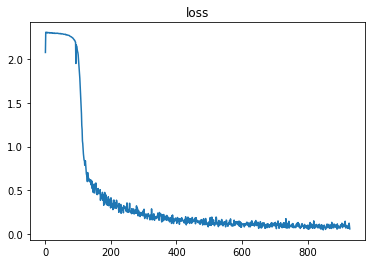

accuracy in train:  tensor(97.3150)
accuracy in test:  tensor(97.8100)


In [ ]:
#training
loss_train = []
accuracy_train = 0
length = 0
j = 0
K = 0
iter = 10
for epoch in range(iter):  # loop over the dataset multiple times

    running_loss = 0.0
    i = 1
    for data in trainloader:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # print(inputs.shape)
        # print(labels.shape)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #print(outputs.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        i+=1
        # print statistics
        if epoch == iter-1:
          _,preds = torch.max(outputs,dim = 1)
          accuracy_train += (preds==labels).sum()
          length += len(labels)
        
        running_loss += loss.item()
        # loss_train.append(loss.item())
        if i % 10 == 0:    # print every 2000 mini-batches
          # print(f'[{epoch + 1}, {i:5d}] loss: {running_loss / 10:.3f}')
          loss_train.append(running_loss /10)
          running_loss = 0.0
          K += 1

accuracy_train = (accuracy_train/length)*100
x_axis = np.arange(0,K,1)
plt.plot(x_axis,loss_train)
plt.title("loss")
plt.show()
# print(net.parameters())
# params = list(net.parameters())
# print(len(params))
# print(params[0])

#testing
length = 0
accuracy_test = 0
for data in testloader:
  inputs,labels = data
  outputs = net(inputs)
  value,preds = torch.max(outputs,dim = 1)
  accuracy_test += (preds==labels).sum()
  length += len(labels)
accuracy_test = (accuracy_test/length)*100

print("accuracy in train: ", accuracy_train)
print("accuracy in test: ",accuracy_test)

In [ ]:
# testing
# length = 0
# accuracy_test = 0
# for data in testloader:
#   inputs,labels = data
#   outputs = net(inputs)
#   value,preds = torch.max(outputs,dim = 1)
#   accuracy_test += (preds==labels).sum()
#   length += len(labels)
# accuracy_test = (accuracy_test/length)*100
# print(accuracy)